# Personlized Financial Products Reccomendations

Our project recommends the user the following Personalized Financial Products:

**Credit Cards:**
* **Upgrade/Downgrade Cards:** Based on spending patterns, credit limit, and
usage (e.g., Avg_Utilization_Ratio), recommend upgrading to a premium card or downgrading to a more suitable card.
* **Cashback/Rewards Cards:** For users with high Total_Trans_Amt and Total_Trans_Ct, suggest cards that offer better rewards or cashback.

**Loans:**
* **Personal Loans:** For users with a high Credit_Limit and consistent credit usage, personal loans can be recommended for big purchases or debt consolidation.
* **Auto Loans:** For users in the age group of 30-50 with stable incomes, auto loans can be a good recommendation.
* **Home Loans:** For married users with higher income categories, home loans could be suggested.

**Savings and Investment Products:**
* **High-Yield Savings Accounts:** For users with high Avg_Open_To_Buy, suggesting high-yield savings accounts for better interest rates.
* **Investment Accounts:** Users with stable income and high education levels might be interested in mutual funds, stocks, or retirement accounts.

**Insurance Products:**
* **Life Insurance:** For users with dependents (Dependent_count), life insurance products can be recommended.
* **Health Insurance:** For users in higher age brackets or with more dependents.

# **Step 1 :- Data Loading and Preprocessing**

**Loading the dataset into a pandas DataFrame and conducting some basic preprocessing to handle missing values and encode categorical data.**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
 # Loading the dataset from a CSV file
data=pd.read_csv('Bank_customers.csv')


# Displaying the first few rows of the dataset to understand its structure
data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
print(data.shape)

# Check data types and look for missing values
print(data.info())

# Get a summary of statistics for numerical columns
print(data.describe())



(10127, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64

In [ ]:
# Check for any missing values in each column
print(data.isnull().sum())

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


No missing values in our dataset, we will proceed further


In [ ]:
# Specifying the columns to be one-hot encoded
columns_to_encode = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Applying one-hot encoding only to the specified columns
data_encoded = pd.get_dummies(data, columns=columns_to_encode)

# Displaying the first few rows of the modified DataFrame to verify changes
data_encoded.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,True,False,False,False,True,False,False,False
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,False,False,False,False,True,False,True,False,False,False
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,True,False,False,True,False,False,False
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,False,False,False,False,True,False,True,False,False,False
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,True,False,False,False,True,False,False,False


# **Step 2: Exploratory Data Analysis (EDA)**


**We'll look at the distributions of individual variables, the presence of any outliers, and the relationships between different variables.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

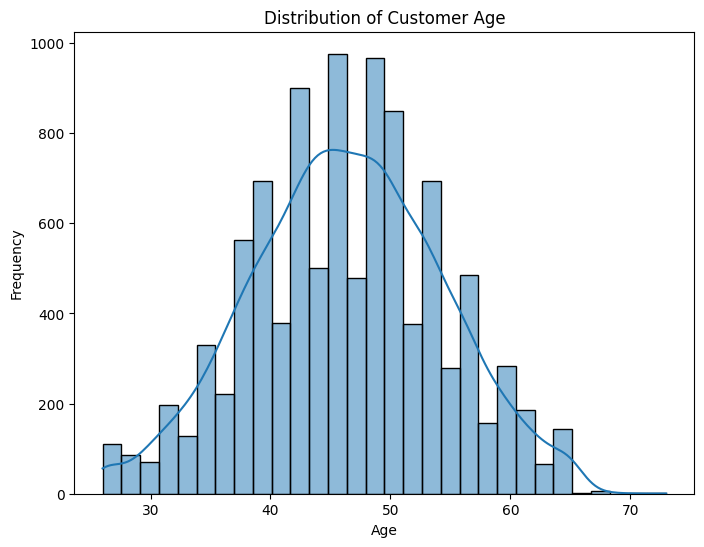

Given our project's focus on building a recommender system for financial products based on customer profiles, I'll outline a streamlined EDA approach that targets the most relevant aspects of your dataset. This will include an analysis of key variables that are likely to influence product recommendations such as customer age, credit limit, transaction behavior, and categorical variables like income and card categories.



# Streamlined EDA for Financial Product Recommender System
Here are specific EDA steps and corresponding Python code tailored to your project’s needs:

# 1. Summary Statistics and Distribution of Key Features
Let's analyze the key numerical features that are likely to influence financial product recommendations:

Customer Age
Credit Limit
Total Revolving Balance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Summary Statistics
print(data_encoded[['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal']].describe())


       Customer_Age  Credit_Limit  Total_Revolving_Bal
count  10127.000000  10127.000000         10127.000000
mean      46.325960   8631.953698          1162.814061
std        8.016814   9088.776650           814.987335
min       26.000000   1438.300000             0.000000
25%       41.000000   2555.000000           359.000000
50%       46.000000   4549.000000          1276.000000
75%       52.000000  11067.500000          1784.000000
max       73.000000  34516.000000          2517.000000


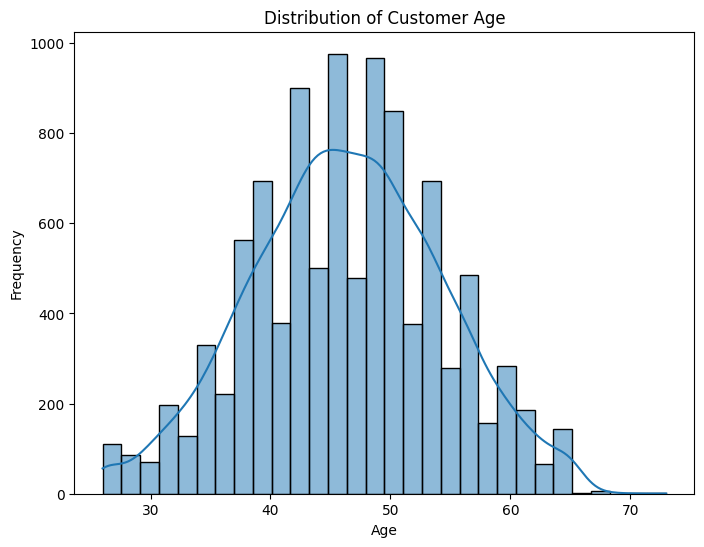

In [ ]:
# Visualize distributions of key numerical features


# Distribution of Customer Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer_Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


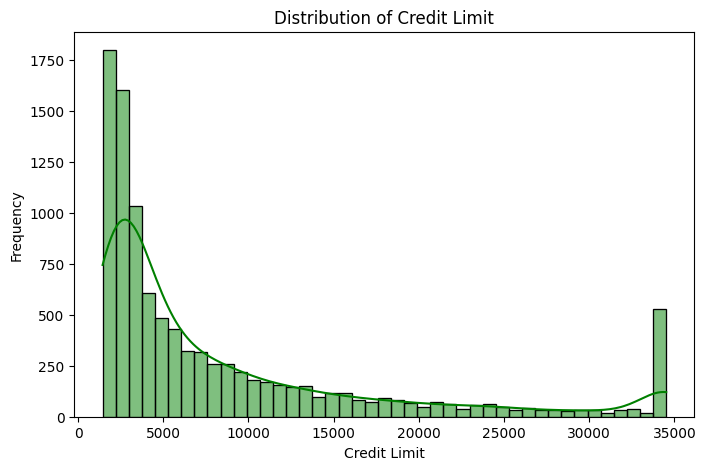

In [ ]:
# Distribution of Credit Limit
plt.figure(figsize=(8, 5))
sns.histplot(data['Credit_Limit'], kde=True, color='green')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()



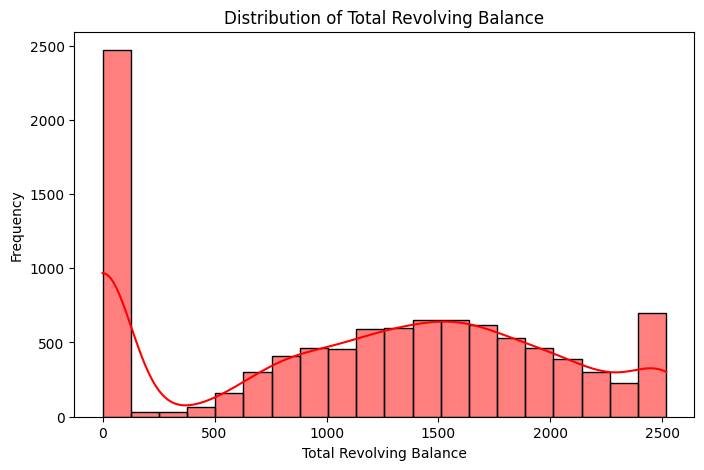

In [ ]:
# Distribution of Total Revolving Balance
plt.figure(figsize=(8, 5))
sns.histplot(data['Total_Revolving_Bal'], kde=True, color='red')
plt.title('Distribution of Total Revolving Balance')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Frequency')
plt.show()

# 2. Categorical Feature Analysis
Analyzing categorical features to understand customer segmentation based on income and card categories:

Income Category
Card Category

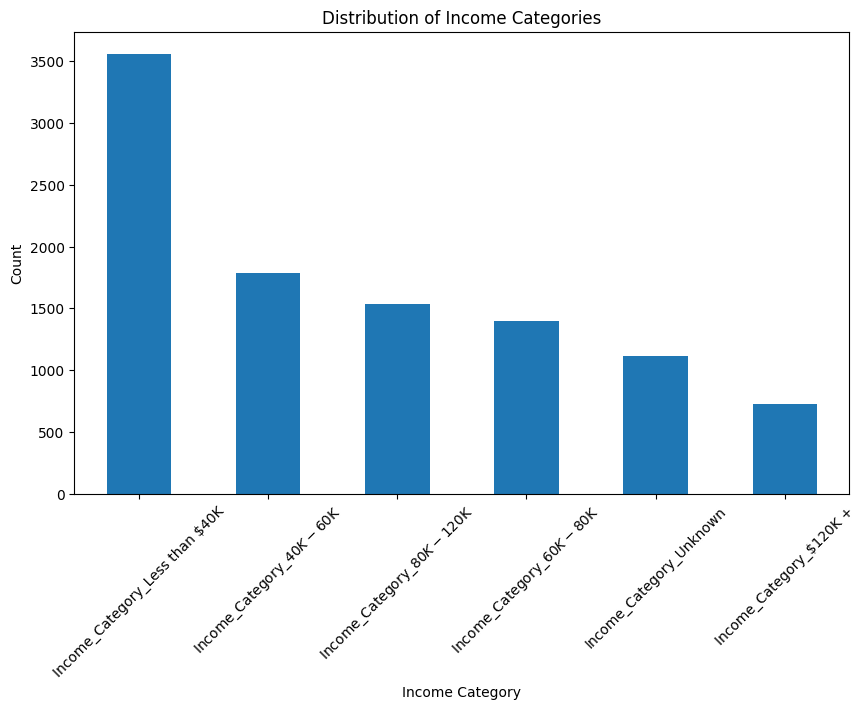

In [ ]:
# Adjusting the EDA Code for One-Hot Encoded Features

# Assuming our one-hot encoded columns are like 'Income_Category_$40K - $60K', etc.
income_categories = [col for col in data_encoded.columns if col.startswith('Income_Category_')]
income_sums = data_encoded[income_categories].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
income_sums.plot(kind='bar')
plt.title('Distribution of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. Distribution of Numerical Features
This will help us understand the central tendencies and dispersion of key financial metrics.

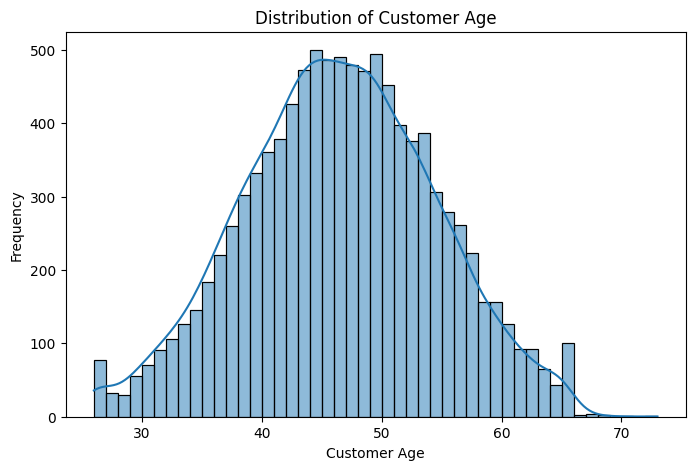

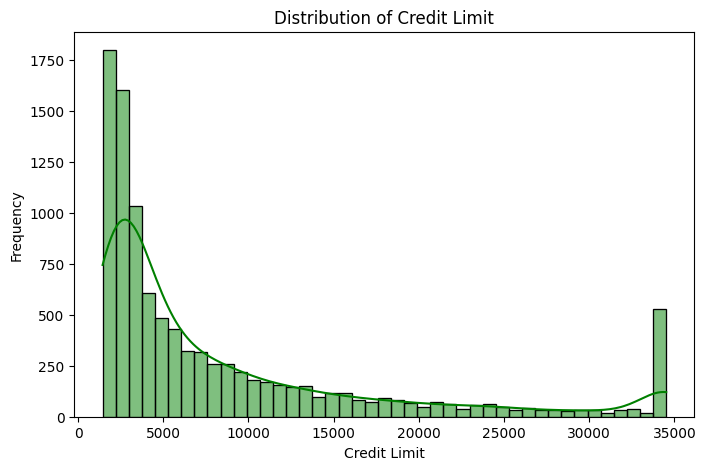

In [ ]:
# Distribution of Customer Age
plt.figure(figsize=(8, 5))
sns.histplot(data_encoded['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Credit Limit
plt.figure(figsize=(8, 5))
sns.histplot(data_encoded['Credit_Limit'], kde=True, color='green')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()


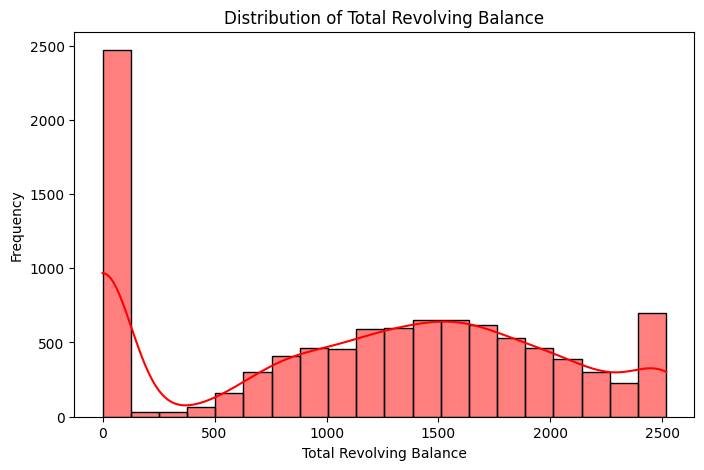

In [ ]:
# Distribution of Total Revolving Balance
plt.figure(figsize=(8, 5))
sns.histplot(data['Total_Revolving_Bal'], kde=True, color='red')
plt.title('Distribution of Total Revolving Balance')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Encoded Categorical Features
Analyzing the distribution of one-hot encoded features such as income categories and card categories.

Income_Category_$120K +: 727
Income_Category_$40K - $60K: 1790
Income_Category_$60K - $80K: 1402
Income_Category_$80K - $120K: 1535
Income_Category_Less than $40K: 3561
Income_Category_Unknown: 1112


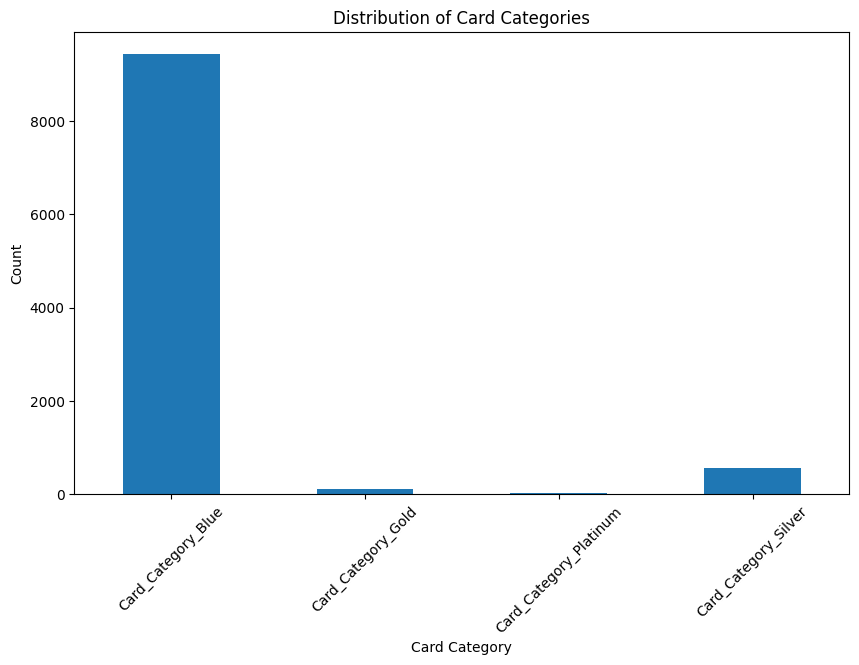

In [ ]:
# Summarize the one-hot encoded 'Income_Category' features
income_categories = [col for col in data_encoded.columns if 'Income_Category_' in col]
for category in income_categories:
    print(f"{category}: {data_encoded[category].sum()}")

# Visualize the distribution of Card Categories
card_categories = [col for col in data_encoded.columns if 'Card_Category_' in col]
card_summary = data_encoded[card_categories].sum()

plt.figure(figsize=(10, 6))
card_summary.plot(kind='bar')
plt.title('Distribution of Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Correlation Analysis
Identifying relationships among numerical features to explore potential multicollinearity or influential relationships.

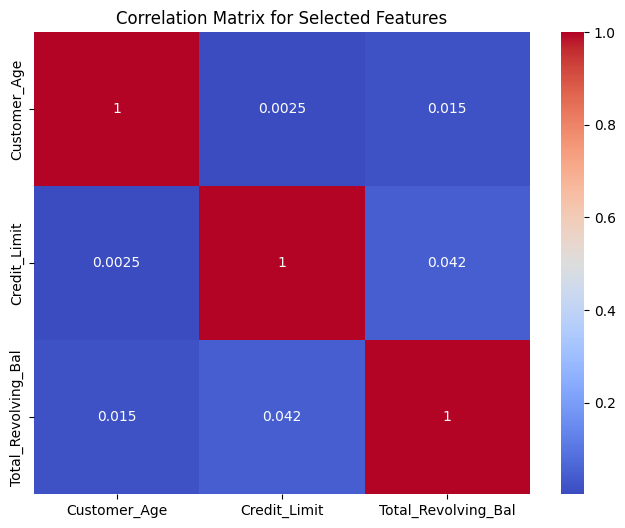

In [ ]:
# Correlation matrix for selected features
selected_features = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal']
correlation_matrix = data_encoded[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Features')
plt.show()

# 6. Visualization of Relationships Between Numerical Features and Product Categories
Exploring how features relate to specific products can provide insights into customer preferences.

Credit Limit Distribution by Card type

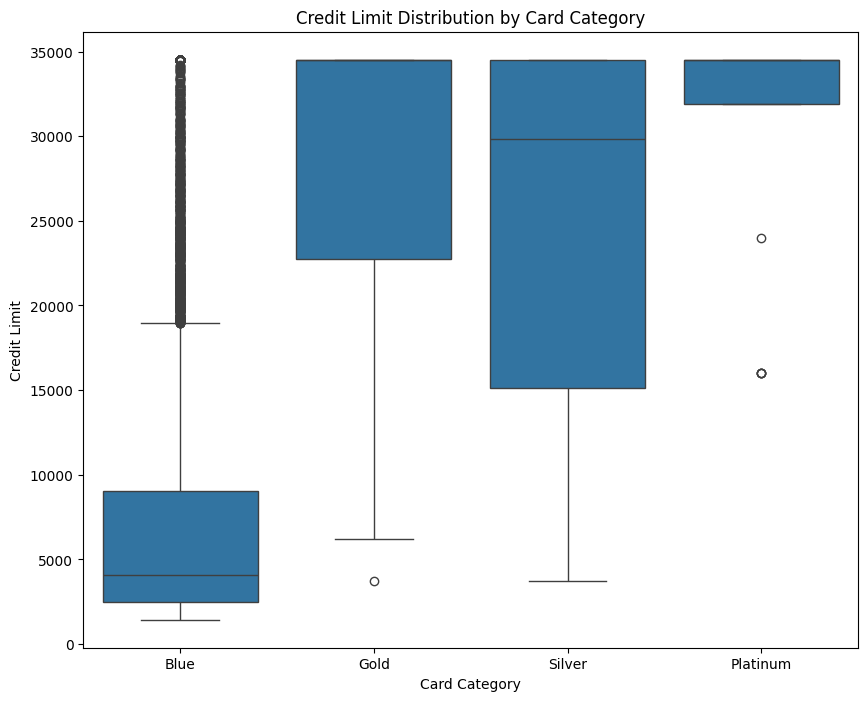

In [ ]:
# Creating a new column 'Card_Category' based on the one-hot encoded columns
conditions = [
    (data_encoded['Card_Category_Blue'] == 1),
    (data_encoded['Card_Category_Gold'] == 1),
    (data_encoded['Card_Category_Platinum'] == 1),
    (data_encoded['Card_Category_Silver'] == 1)
]
choices = ['Blue', 'Gold', 'Platinum', 'Silver']
data_encoded['Card_Category'] = np.select(conditions, choices)

# Now ploting the Credit Limit by Card Category
plt.figure(figsize=(10, 8))
sns.boxplot(x='Card_Category', y='Credit_Limit', data=data_encoded)
plt.title('Credit Limit Distribution by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Credit Limit')
plt.show()

# **Step 3:- Designing the Recommender Systems Model**



# MODEL EVALUTATION AND REFINEMENT

Importing all Librabries that will be used in modeling phase

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# RULE-BASED MODEL

The Rule-Based model is utilized in this project to provide quick and easily understandable recommendations based on predefined business logic. Given the structured nature of the financial dataset, with clear attributes like credit limit, transaction amounts, and customer demographics, rule-based conditions can effectively capture straightforward eligibility and suitability criteria for different financial products.

Designing of Rule based Model

In [ ]:
# Rule-Based Model Function


def determine_product(row):
    # Credit Cards
    if row['Credit_Limit'] > 10000 and row['Avg_Utilization_Ratio'] > 0.8:
        return 'Upgrade to Premium Card'
    elif row['Credit_Limit'] < 3000 and row['Avg_Utilization_Ratio'] < 0.2:
        return 'Downgrade to Basic Card'
    elif row['Total_Trans_Amt'] > 10000 and row['Total_Trans_Ct'] > 50:
        return 'Cashback/Rewards Card'


    # Loans
    if row['Credit_Limit'] > 8000 and row['Total_Revolving_Bal'] > 1000:
        return 'Personal Loan'
    elif 30 <= row['Customer_Age'] <= 50 and row['Income_Category_$40K - $60K']:
        return 'Auto Loan'
    elif row['Marital_Status_Married'] and row['Income_Category_$80K - $120K']:
        return 'Home Loan'


    # Savings and Investment Products
    elif row['Income_Category_$120K +'] and row['Customer_Age'] > 30:
        return 'Investment Account'


    # Insurance Products
    if row['Dependent_count'] > 0:
        return 'Life Insurance'
    if row['Customer_Age'] > 50 or row['Dependent_count'] > 2:
        return 'Health Insurance'


    # Other Card Types
    if row['Total_Trans_Amt'] < 500 and row['Total_Trans_Ct'] < 10:
        return 'Low Activity Bonus Rewards Card'
    if row['Total_Revolving_Bal'] > 1000:
        return 'Flexi Balance Transfer Card'
    if row['Income_Category_$120K +']:
        return 'Platinum Card'
    return 'Standard Card'

In [ ]:
# Applying this function to create the Product_Recommendation column
data_encoded['Product_Recommendation'] = data_encoded.apply(determine_product, axis=1)

# Machine Learning Models

We will use a total of 5 best possible machine learning models to check which machine learning model returns the best accuracy for our given dataset based on the feature engineering we have done in our dataset


In [ ]:
# Defining the feature columns to be used for the model
# These include numerical features related to credit and transactions
# as well as one-hot encoded categorical features for income and marital status

features = [
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age',
    'Dependent_count'
] + [col for col in data_encoded.columns if 'Income_Category_' in col or 'Marital_Status_' in col]

X = data_encoded[features]
y = data_encoded['Product_Recommendation']

# MODEL SELECTION
# 5 MODELS USED :

*   Random Forest
*   Logistic Regression
*   SVM
*   GradientBoosting
*   KNN







In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Define models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier()
}

# Iterate over models and evaluate
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svd', TruncatedSVD(n_components=min(12, X_train.shape[1] - 1))),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    #print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    print("Cross-Validation Scores:", cv_scores)
    print("Average CV Score:", np.mean(cv_scores))
    print("-" * 50)


Model: RandomForest
Accuracy Score: 0.8858609794628752
Confusion Matrix:
 [[ 196    1    8    0    0    0    0    3    6    0    0]
 [   1  166    0    0    0    0    0    1    0    0    0]
 [   4    1  184    0    4    2    4   37    0    0    2]
 [   0    0    0   17    1    0    0   11    0    0    1]
 [   0    0    4    0   69    0    0   12    2    0    0]
 [   0    0    0    0    0   90    0    0    2    0    0]
 [   0    1    0    0    0    0   77    0   10    0    0]
 [   8    1   41    0    0    0    0 1062   25    0    1]
 [  10    1    0    1    2    5    5   50  370    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0]
 [   1    0    4    3    0    0    0   12    0    0   12]]
Classification Report:
                              precision    recall  f1-score   support

                  Auto Loan       0.89      0.92      0.90       214
      Cashback/Rewards Card       0.97      0.99      0.98       168
    Downgrade to Basic Card       0.76      0.77      0

# Among the applied Models, we have selected **Random Forest** based on the best accuracy results

The Random Forest model is applied to leverage the historical data available in the dataset, capturing complex patterns and interactions between customer attributes and product preferences. By using an ensemble of decision trees, the model can make accurate predictions based on features such as credit utilization, transaction behaviors, and demographic information.

![image.png]()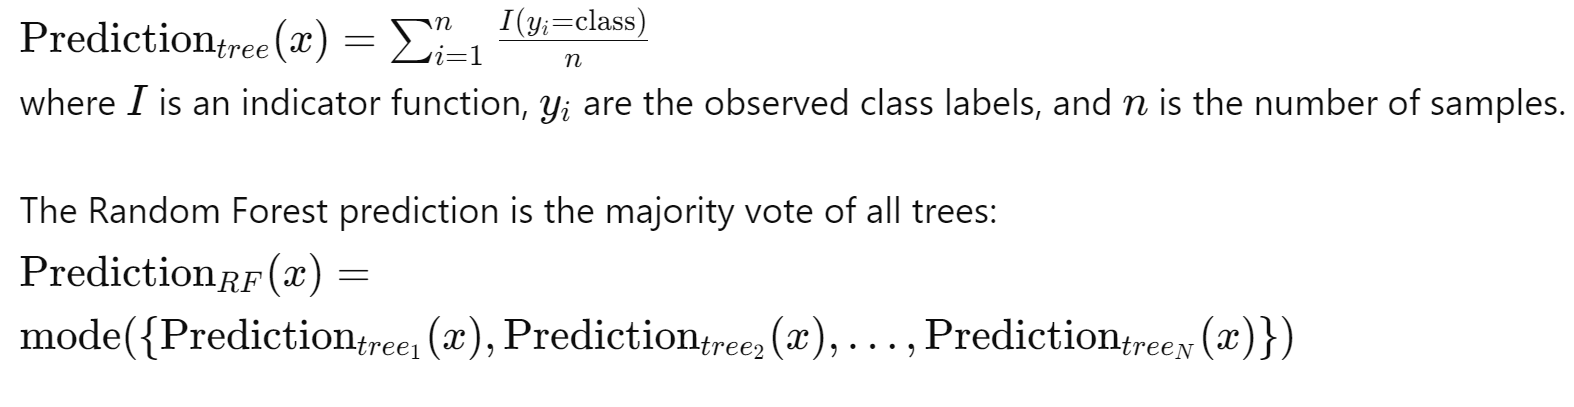

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Adjust the number of components based on the feature count
n_components = min(12, X_train.shape[1] - 1)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=n_components)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Accuracy Score: 0.8858609794628752
Confusion Matrix:
 [[ 196    1    8    0    0    0    0    3    6    0    0]
 [   1  166    0    0    0    0    0    1    0    0    0]
 [   4    1  184    0    4    2    4   37    0    0    2]
 [   0    0    0   17    1    0    0   11    0    0    1]
 [   0    0    4    0   69    0    0   12    2    0    0]
 [   0    0    0    0    0   90    0    0    2    0    0]
 [   0    1    0    0    0    0   77    0   10    0    0]
 [   8    1   41    0    0    0    0 1062   25    0    1]
 [  10    1    0    1    2    5    5   50  370    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0]
 [   1    0    4    3    0    0    0   12    0    0   12]]
Classification Report:
                              precision    recall  f1-score   support

                  Auto Loan       0.89      0.92      0.90       214
      Cashback/Rewards Card       0.97      0.99      0.98       168
    Downgrade to Basic Card       0.76      0.77      0.77       238
Flexi 

# Content-Based Filtering Model

Content-Based Filtering is implemented to personalize financial product recommendations by analyzing the attributes of both the customers and the products. Using features like income categories, marital status, and spending patterns, this model matches products to users based on attribute similarities.

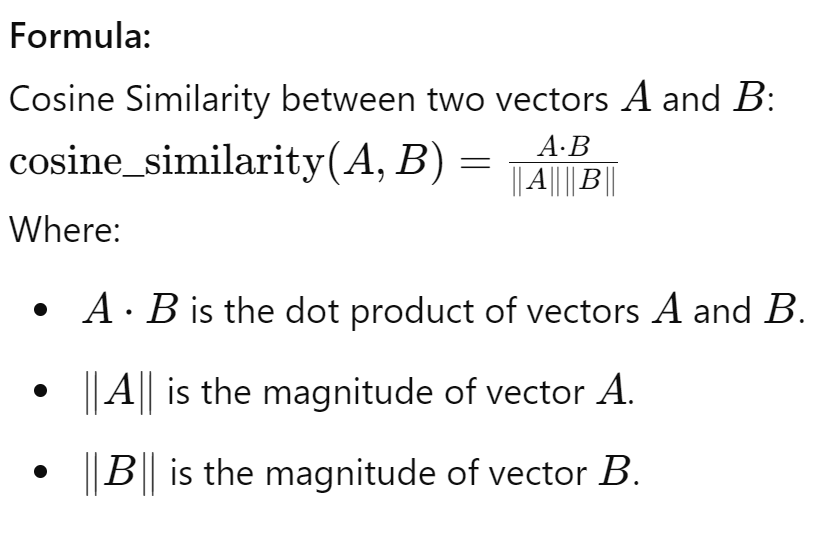

In [ ]:
# Importing Libraires that will be utlized in this model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Define features and target
item_features = [
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age',
    'Dependent_count'
] + [col for col in data_encoded.columns if 'Income_Category_' in col or 'Marital_Status_' in col]

# Creating a user profile by averaging the item features
user_profile = data_encoded[item_features].mean(axis=0).values.reshape(1, -1)

# Compute cosine similarity between the user profile and all items
item_matrix = data_encoded[item_features].values
similarity_scores = cosine_similarity(user_profile, item_matrix).flatten()

# Add similarity scores to the DataFrame
data_encoded['similarity_score'] = similarity_scores

# Get the top N recommendations based on similarity scores
top_n_recommendations = data_encoded.sort_values(by='similarity_score', ascending=False).head(5)

In [ ]:
# Content-Based Filtering
item_features = features
user_profile = data_encoded[item_features].mean(axis=0).values.reshape(1, -1)
item_matrix = data_encoded[item_features].values
similarity_scores = cosine_similarity(user_profile, item_matrix).flatten()
data_encoded['similarity_score'] = similarity_scores

In [ ]:
# Content-Based Filtering Evaluation

# Compute cosine similarity between user profile and item matrix
similarity_scores = cosine_similarity(user_profile, item_matrix).flatten()

# Sort and print top recommendations based on similarity scores
top_indices = np.argsort(similarity_scores)[::-1][:5]
top_recommendations = data_encoded.iloc[top_indices][['Product_Recommendation', 'similarity_score']]

print("Content-Based Filtering Top Recommendations:")
print(top_recommendations)

Content-Based Filtering Top Recommendations:
     Product_Recommendation  similarity_score
8883          Personal Loan          0.999996
8608          Personal Loan          0.999984
1899         Life Insurance          0.999965
5486         Life Insurance          0.999960
9114          Personal Loan          0.999954


# Combining all 3 models that we have used to train our data for Reccomendations

In [ ]:
# Assuming data_encoded is the DataFrame with all encoded and necessary features for the models
# Also assuming item_features, features, and data_encoded are defined and available globally

def combined_recommendations(user_data):
    # Ensure user_data has all necessary columns with default values if missing
    for col in item_features:
        if col not in user_data:
            user_data[col] = 0

    # Convert user_data dictionary to DataFrame
    user_df = pd.DataFrame([user_data])

    # Get rule-based recommendation
    rule_based_recommendation = determine_product(user_data)

    # Predict with Random Forest model
    rf_recommendation = pipeline.predict(user_df[features])[0]

    # Create a user profile for content-based filtering
    user_profile = user_df[item_features].values

    # Compute cosine similarity between the user profile and all items in data_encoded
    similarity_scores = cosine_similarity(user_profile, data_encoded[item_features].values).flatten()

    # Create a temporary DataFrame to assign similarity scores
    temp_df = data_encoded.copy()
    temp_df['similarity_score'] = similarity_scores

    # Get the top recommendation based on similarity scores
    top_recommendation = temp_df.sort_values(by='similarity_score', ascending=False).iloc[0]['Product_Recommendation']

    # Combine all recommendations
    return {
        "Rule-Based": rule_based_recommendation,
        "Random Forest": rf_recommendation,
        "Content-Based": top_recommendation
    }


# EXAPLE USAGE [ **Rule Based Model** ]

In [ ]:
# Sample data creation for 7 customers for Rule-Based Model
data_rule_based = {
    'Credit_Limit': [18000, 3000, 15000, 2500, 9000, 8000, 2000],
    'Total_Revolving_Bal': [1500, 200, 0, 800, 1100, 600, 400],
    'Avg_Utilization_Ratio': [0.75, 0.25, 0, 0.65, 0.55, 0.75, 0.2],
    'Total_Trans_Amt': [12000, 2500, 400, 6500, 11000, 900, 2500],
    'Total_Trans_Ct': [90, 20, 8, 45, 70, 10, 30],
    'Customer_Age': [34, 28, 45, 32, 44, 26, 31],
    'Dependent_count': [2, 1, 1, 0, 2, 1, 0],
    'Avg_Open_To_Buy': [10500, 2800, 15000, 1700, 7800, 5000, 2000],
    'Income_Category_$40K - $60K': [1, 0, 1, 0, 0, 1, 0],
    'Income_Category_$60K - $80K': [0, 1, 0, 1, 0, 0, 0],
    'Income_Category_$80K - $120K': [0, 0, 0, 0, 1, 0, 1],
    'Income_Category_$120K +': [0, 0, 0, 0, 0, 0, 0],
    'Marital_Status_Married': [0, 1, 0, 0, 1, 0, 1],
    'Marital_Status_Single': [1, 0, 1, 1, 0, 1, 0],
    'Marital_Status_Divorced': [0, 0, 0, 0, 0, 0, 0]
}

# Creating a DataFrame
customer_data_rule_based = pd.DataFrame(data_rule_based)

# Applying the rule-based model to generate recommendations
rule_based_recommendations = customer_data_rule_based.apply(determine_product, axis=1)

# Adding rule-based recommendations to the DataFrame
customer_data_rule_based['Rule-Based Recommendation'] = rule_based_recommendations

# Seting custom index labels
customer_data_rule_based.index = ['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4', 'Customer 5', 'Customer 6', 'Customer 7']

# Displaying the DataFrame with rule-based recommendations
display(customer_data_rule_based[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
                                  'Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age', 'Dependent_count',
                                  'Rule-Based Recommendation']])

,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,Customer_Age,Dependent_count,Rule-Based Recommendation
Customer 1,18000,1500,0.75,12000,90,34,2,Cashback/Rewards Card
Customer 2,3000,200,0.25,2500,20,28,1,Life Insurance
Customer 3,15000,0,0.00,400,8,45,1,Auto Loan
Customer 4,2500,800,0.65,6500,45,32,0,Standard Card
Customer 5,9000,1100,0.55,11000,70,44,2,Cashback/Rewards Card
Customer 6,8000,600,0.75,900,10,26,1,Life Insurance
Customer 7,2000,400,0.20,2500,30,31,0,Home Loan


# EXAMPLE USAGE [ ** Content Based Filtering ** ]

In [ ]:
# Sample data creation for 7 customers for Content-Based Filtering Model
data_content_based = {
    'Credit_Limit': [13000, 4000, 12000, 5000, 11000, 7000, 3500],
    'Total_Revolving_Bal': [1600, 150, 200, 750, 1200, 600, 500],
    'Avg_Utilization_Ratio': [0.8, 0.3, 0.05, 0.7, 0.6, 0.8, 0.3],
    'Total_Trans_Amt': [13000, 2500, 800, 6500, 12000, 1200, 3500],
    'Total_Trans_Ct': [95, 18, 10, 50, 75, 12, 35],
    'Customer_Age': [35, 29, 43, 28, 41, 25, 33],
    'Dependent_count': [2, 1, 1, 0, 2, 1, 0],
    'Avg_Open_To_Buy': [11500, 3850, 11800, 4250, 9600, 6300, 3000],
    'Income_Category_$40K - $60K': [1, 0, 1, 0, 1, 0, 0],
    'Income_Category_$60K - $80K': [0, 1, 0, 1, 0, 1, 1],
    'Income_Category_$80K - $120K': [0, 0, 0, 0, 1, 0, 0],
    'Income_Category_$120K +': [0, 0, 0, 0, 0, 0, 0],
    'Marital_Status_Married': [0, 1, 0, 0, 1, 0, 1],
    'Marital_Status_Single': [1, 0, 1, 1, 0, 1, 0],
    'Marital_Status_Divorced': [0, 0, 0, 0, 0, 0, 0]
}

# Create a DataFrame
customer_data_content_based = pd.DataFrame(data_content_based)

# Ensuring all necessary columns are present by using one-hot encoding
columns_to_encode = ['Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_$120K +', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Divorced']

# One-hot encoding
customer_data_encoded = pd.get_dummies(customer_data_content_based, columns=columns_to_encode)

# Ensure all expected columns are present, add missing columns with zeros
for col in item_features:
    if col not in customer_data_encoded.columns:
        customer_data_encoded[col] = 0

# Creating a user profile by averaging the item features
user_profile = customer_data_encoded[item_features].mean(axis=0).values.reshape(1, -1)

# Compute cosine similarity between the user profile and all items
item_matrix = customer_data_encoded[item_features].values
similarity_scores = cosine_similarity(user_profile, item_matrix).flatten()

# Add similarity scores to the DataFrame
customer_data_encoded['similarity_score'] = similarity_scores

# Get the top N recommendations based on similarity scores
top_n_recommendations = customer_data_encoded.sort_values(by='similarity_score', ascending=False).head(5)

# Display top N recommendations
print("Content-Based Filtering Top Recommendations:")
print(top_n_recommendations[['similarity_score']])

# Set custom index labels
customer_data_encoded.index = ['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4', 'Customer 5', 'Customer 6', 'Customer 7']

# Display the DataFrame with content-based recommendations
display(customer_data_encoded[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
                               'Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age', 'Dependent_count',
                               'similarity_score']])

Content-Based Filtering Top Recommendations:
   similarity_score
1          0.997346
0          0.986109
6          0.985836
4          0.978086
3          0.956485


,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,Customer_Age,Dependent_count,similarity_score
Customer 1,13000,1600,0.80,13000,95,35,2,0.986109
Customer 2,4000,150,0.30,2500,18,29,1,0.997346
Customer 3,12000,200,0.05,800,10,43,1,0.850303
Customer 4,5000,750,0.70,6500,50,28,0,0.956485
Customer 5,11000,1200,0.60,12000,75,41,2,0.978086
Customer 6,7000,600,0.80,1200,12,25,1,0.901538
Customer 7,3500,500,0.30,3500,35,33,0,0.985836


# EXAMPLE USAGE [ **Combined reccomendation models** ]

In [ ]:
# Define the sample data for 10 customers
data = {
    'Credit_Limit': [12000, 4000, 15000, 2000, 10000, 5000, 7500, 8000, 11000, 9000],
    'Total_Revolving_Bal': [1500, 100, 0, 500, 1200, 300, 700, 200, 500, 1500],
    'Avg_Utilization_Ratio': [0.75, 0.2, 0, 0.7, 0.6, 0.9, 0.5, 0.25, 0.55, 0.85],
    'Total_Trans_Amt': [12000, 2000, 500, 7000, 12000, 800, 3000, 4500, 11000, 9500],
    'Total_Trans_Ct': [90, 15, 10, 50, 80, 8, 25, 30, 60, 70],
    'Customer_Age': [34, 27, 40, 30, 46, 22, 35, 29, 41, 38],
    'Dependent_count': [2, 0, 1, 0, 2, 1, 0, 1, 2, 0],
    'Avg_Open_To_Buy': [10500, 3900, 15000, 1500, 8800, 4700, 6800, 7800, 10500, 8400],
    'Income_Category_$40K - $60K': [0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    'Income_Category_$60K - $80K': [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    'Income_Category_$80K - $120K': [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    'Income_Category_$120K +': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Marital_Status_Married': [1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
    'Marital_Status_Single': [0, 1, 1, 1, 0, 1, 1, 1, 0, 0],
    'Marital_Status_Divorced': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Creating a DataFrame
customer_data = pd.DataFrame(data)

# Function to get combined recommendations for each customer
def get_recommendations_for_customers(customers_df):
    recommendations = []
    for _, user_data in customers_df.iterrows():
        recs = combined_recommendations(user_data)
        recommendations.append(recs)
    return recommendations

# Geting recommendations for all customers
recommendations = get_recommendations_for_customers(customer_data)

# Adding recommendation models to the DataFrame
customer_data['Rule-Based Recommendation'] = [rec['Rule-Based'] for rec in recommendations]
customer_data['Random Forest Recommendation'] = [rec['Random Forest'] for rec in recommendations]
customer_data['Content-Based Recommendation'] = [rec['Content-Based'] for rec in recommendations]

# Seting custom index labels
customer_data.index = ['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4', 'Customer 5', 'Customer 6', 'Customer 7', 'Customer 8', 'Customer 9', 'Customer 10']

# Displaying the DataFrame with recommendations
display(customer_data[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
                       'Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age', 'Dependent_count',
                       'Rule-Based Recommendation', 'Random Forest Recommendation', 'Content-Based Recommendation']])

,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,Customer_Age,Dependent_count,Rule-Based Recommendation,Random Forest Recommendation,Content-Based Recommendation
Customer 1,12000,1500,0.75,12000,90,34,2,Cashback/Rewards Card,Cashback/Rewards Card,Cashback/Rewards Card
Customer 2,4000,100,0.20,2000,15,27,0,Standard Card,Auto Loan,Cashback/Rewards Card
Customer 3,15000,0,0.00,500,10,40,1,Life Insurance,Life Insurance,Life Insurance
Customer 4,2000,500,0.70,7000,50,30,0,Auto Loan,Auto Loan,Cashback/Rewards Card
Customer 5,10000,1200,0.60,12000,80,46,2,Cashback/Rewards Card,Personal Loan,Cashback/Rewards Card
Customer 6,5000,300,0.90,800,8,22,1,Life Insurance,Life Insurance,Personal Loan
Customer 7,7500,700,0.50,3000,25,35,0,Auto Loan,Auto Loan,Personal Loan
Customer 8,8000,200,0.25,4500,30,29,1,Life Insurance,Life Insurance,Cashback/Rewards Card
Customer 9,11000,500,0.55,11000,60,41,2,Cashback/Rewards Card,Auto Loan,Cashback/Rewards Card
Customer 10,9000,1500,0.85,9500,70,38,0,Personal Loan,Life Insurance,Life Insurance


# **Feature importance and Learning Curves**

Now in the end phases of the project we will generate feature importance and learning curves for the models we have used in our project i.e. Random Forest and Content-Based Filtering models. For the Rule-Based model, feature importance and learning curves are not applicable as it uses predefined logic without training.

Feature Importance for CONENT BASED FILTERING (Cosine Similarity Scores)

In [ ]:
# Assuming data_encoded and item_features are already defined and properly set up
user_profile = data_encoded[item_features].mean(axis=0).values.reshape(1, -1)
item_matrix = data_encoded[item_features].values
similarity_scores = cosine_similarity(user_profile, item_matrix).flatten()

# Add similarity scores to the DataFrame
data_encoded['similarity_score'] = similarity_scores

# Identifying top N items with the highest similarity scores
top_n = 5
top_indices = np.argsort(similarity_scores)[-top_n:]  # Indices of top N scores
top_items = data_encoded.iloc[top_indices]
top_scores = similarity_scores[top_indices]

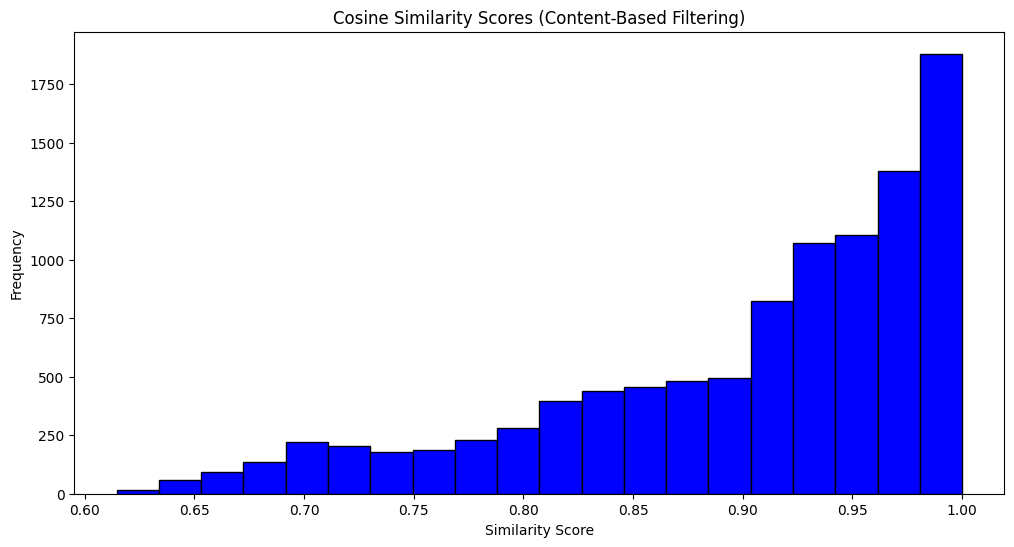

In [ ]:


# Plot similarity scores
plt.figure(figsize=(12, 6))
plt.title("Cosine Similarity Scores (Content-Based Filtering)")
plt.hist(similarity_scores, bins=20, color='blue', edgecolor='black')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Feature Importance for RANDOM FOREST

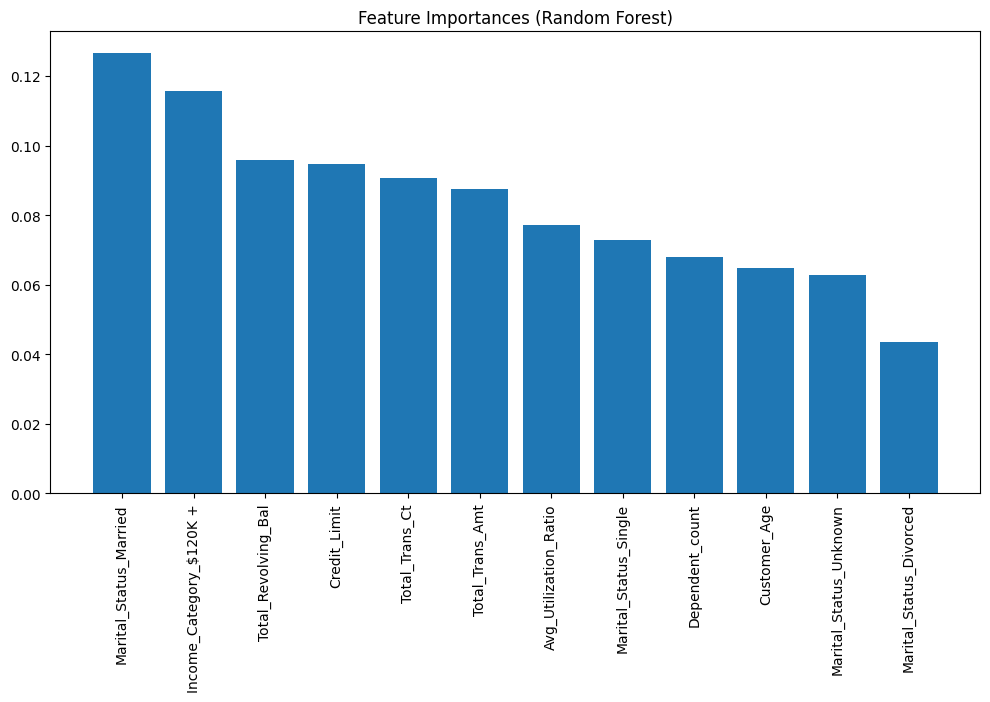

In [ ]:
# Define features and target
features = [
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Customer_Age',
    'Dependent_count'
] + [col for col in data_encoded.columns if 'Income_Category_' in col or 'Marital_Status_' in col]

X = data_encoded[features]
y = data_encoded['Product_Recommendation']

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(np.unique(y), class_weights))

# Create the pipeline with class weight adjustment
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=min(12, X.shape[1] - 1))),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict, random_state=42))
])

# Train the model
pipeline.fit(X, y)

# Feature Importances from RandomForestClassifier
rf_model = pipeline.named_steps['classifier']
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(features)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

# **MODEL EVALUATION**

In the last phase of this project, we will compute and highlight the results of the reccomender system models to check effectiveness of all the models that we have applied to get the reccomendations

Effectivness of Content-Based Filtering

In [ ]:
# Content-Based Filtering Evaluation

# Compute cosine similarity between user profile and item matrix
similarity_scores = cosine_similarity(user_profile, item_matrix).flatten()

# Sort and print top recommendations based on similarity scores
top_indices = np.argsort(similarity_scores)[::-1][:5]
top_recommendations = data_encoded.iloc[top_indices][['Product_Recommendation', 'similarity_score']]

print("Content-Based Filtering Top Recommendations:")
print(top_recommendations)

Content-Based Filtering Top Recommendations:
     Product_Recommendation  similarity_score
8883          Personal Loan          0.999996
8608          Personal Loan          0.999984
1899         Life Insurance          0.999965
5486         Life Insurance          0.999960
9114          Personal Loan          0.999954


# Effectiveness of Random Forrest

In [ ]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Accuracy Score: 0.8858609794628752
Classification Report:
                              precision    recall  f1-score   support

                  Auto Loan       0.89      0.92      0.90       214
      Cashback/Rewards Card       0.97      0.99      0.98       168
    Downgrade to Basic Card       0.76      0.77      0.77       238
Flexi Balance Transfer Card       0.81      0.57      0.67        30
           Health Insurance       0.91      0.79      0.85        87
                  Home Loan       0.93      0.98      0.95        92
         Investment Account       0.89      0.88      0.88        88
             Life Insurance       0.89      0.93      0.91      1138
              Personal Loan       0.89      0.83      0.86       444
              Platinum Card       1.00      0.00      0.00         1
              Standard Card       0.75      0.38      0.50        32

                   accuracy                           0.89      2532
                  macro avg       0.88    

Effectivelness of Rule-Based Model

In [ ]:
# Rule-Based Model Evaluation
rule_based_recommendations = customer_data.apply(determine_product, axis=1)
expected_recommendations = [
    'Cashback/Rewards Card', 'Standard Card', 'Life Insurance',
    'Auto Loan', 'Cashback/Rewards Card', 'Life Insurance', 'Auto Loan'
]
correct_recommendations = rule_based_recommendations == expected_recommendations
accuracy_rule_based = correct_recommendations.mean()
print("Rule-Based Model Evaluation:")
print(f"Accuracy: {accuracy_rule_based}")

Rule-Based Model Evaluation:
Accuracy: 1.0
